<a href="https://colab.research.google.com/github/elenakelly/Information-Retrieval-and-Text-Mining/blob/main/02_2_Tutorial_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start by copying this into your Google Drive!!

# Information Retrieval & Text Mining 2023
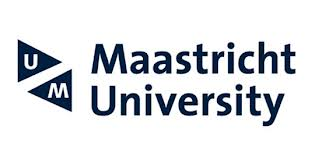
## Tutorial 2 - Notebook 2 
Adapted and updated from [here](https://github.com/castorini/anserini-notebooks-afirm2020)

# Indexing

In this activity, we are going to index the [MS MARCO](http://www.msmarco.org/) passage collection and explore some features of the index.

## Setup

We are going to use the open-source [Anserini](https://github.com/castorini/anserini) information retrieval toolkit to run the experiments.
Anserini provides an easy-to-use interface over the popular [Apache Lucene](https://lucene.apache.org/) search library to facilitate rapid experimentation.

Here we clone the repository from GitHub but won't be dealing with other facets of Git. If you want to dive deeper into Git, here are some good resources:

- [Visual Git](http://marklodato.github.io/visual-git-guide/index-en.html)
- [Think Like (a) Git](http://think-like-a-git.net/)
- [Git from the bottom up](http://ftp.newartisans.com/pub/git.from.bottom.up.pdf)

In [1]:
!git clone https://github.com/castorini/anserini.git
!cd anserini && git checkout ad5ba1c76196436f8a0e28efdb69960d4873efe3

Cloning into 'anserini'...
remote: Enumerating objects: 27295, done.
remote: Counting objects: 100% (1613/1613), done.
remote: Compressing objects: 100% (340/340), done.
remote: Total 27295 (delta 1364), reused 1443 (delta 1243), pack-reused 25682
Receiving objects: 100% (27295/27295), 84.46 MiB | 19.48 MiB/s, done.
Resolving deltas: 100% (18014/18014), done.
Note: switching to 'ad5ba1c76196436f8a0e28efdb69960d4873efe3'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at ad5ba1c7 Release notes for v0.9.2 (#1197)


Set up Java 11:

In [2]:
!apt-get install -y openjdk-11-jdk-headless
%env JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-11-jdk-headless is already the newest version (11.0.18+10-0ubuntu1~20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
env: JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64


After cloning the Anserini repo, we should build it using Maven.

In [3]:
# Install Maven
!apt-get install -q maven

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libaopalliance-java libapache-pom-java libatinject-jsr330-api-java
  libcdi-api-java libcommons-cli-java libcommons-io-java libcommons-lang3-java
  libcommons-parent-java libgeronimo-annotation-1.3-spec-java
  libgeronimo-interceptor-3.0-spec-java libguava-java libguice-java
  libhawtjni-runtime-java libjansi-java libjansi-native-java libjsr305-java
  libmaven-parent-java libmaven-resolver-java libmaven-shared-utils-java
  libmaven3-core-java libplexus-cipher-java libplexus-classworlds-java
  libplexus-component-annotations-java libplexus-interpolation-java
  libplexus-sec-dispatcher-java libplexus-utils2-java libsisu-inject-java
  libsisu-plexus-java libslf4j-java libwagon-file-java
  libwagon-http-shaded-java libwagon-provider-api-java
Suggested packages:
  libaopalliance-java-doc libatinject-jsr330-api-java-doc libservlet3.1-java
  libcommons-io-ja

Now is the time to build the `trec_eval` tool (more on this later):

In [4]:
!cd anserini/eval && tar xvfz trec_eval.9.0.4.tar.gz && cd trec_eval.9.0.4 && make

trec_eval.9.0.4/
trec_eval.9.0.4/m_prefs_pair.c
trec_eval.9.0.4/m_ndcg_p.c
trec_eval.9.0.4/m_infap.c
trec_eval.9.0.4/m_num_q.c
trec_eval.9.0.4/m_iprec_at_recall.c
trec_eval.9.0.4/form_prefs_counts.c
trec_eval.9.0.4/m_prefs_num_prefs_ful_ret.c
trec_eval.9.0.4/utility_pool.c
trec_eval.9.0.4/m_binG.c
trec_eval.9.0.4/meas_avg.c
trec_eval.9.0.4/m_gm_bpref.c
trec_eval.9.0.4/m_runid.c
trec_eval.9.0.4/m_bpref.c
trec_eval.9.0.4/m_gm_map.c
trec_eval.9.0.4/trec_eval.h
trec_eval.9.0.4/m_yaap.c
trec_eval.9.0.4/m_relstring.c
trec_eval.9.0.4/m_Rprec.c
trec_eval.9.0.4/m_prefs_avgjg.c
trec_eval.9.0.4/m_success.c
trec_eval.9.0.4/m_ndcg.c
trec_eval.9.0.4/functions.h
trec_eval.9.0.4/m_P_avgjg.c
trec_eval.9.0.4/test/
trec_eval.9.0.4/test/qrels.rel_level
trec_eval.9.0.4/test/results.test
trec_eval.9.0.4/test/qrels.test
trec_eval.9.0.4/test/out.test.qrels_jg
trec_eval.9.0.4/test/out.test.meas_params
trec_eval.9.0.4/test/out.test.a
trec_eval.9.0.4/test/out.test.prefs
trec_eval.9.0.4/test/out.test.aqcM
trec_ev

Now lets build anserini. Please note that Maven has rather verbose logging, but so you only output the final lines that indicate whether or not the build succeeded.

In [5]:
# Build Anserini
!cd anserini && mvn clean package appassembler:assemble | grep "BUILD"

[INFO] BUILD SUCCESS


## Data Preparation

MS MARCO (MicroSoft MAchine Reading COmprehension) is a large-scale dataset that defines many tasks from question answering to ranking.
Here we focus on the collection designed for passage re-ranking.

This collection is composed of the top 1000 most relevant passages for each query, as retrieved by BM25.

First, create a directory named `data/msmarco_passage` to hold the collection. Next, download the MS MARCO passage collection from the official MS MARCO mirror and extract the dataset.

In [6]:
!mkdir -p data/msmarco_passage
!wget https://msmarco.blob.core.windows.net/msmarcoranking/collectionandqueries.tar.gz
!tar -xvf collectionandqueries.tar.gz -C data/msmarco_passage

--2023-04-21 12:34:46--  https://msmarco.blob.core.windows.net/msmarcoranking/collectionandqueries.tar.gz
Resolving msmarco.blob.core.windows.net (msmarco.blob.core.windows.net)... 20.150.34.4
Connecting to msmarco.blob.core.windows.net (msmarco.blob.core.windows.net)|20.150.34.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1057717952 (1009M) [application/gzip]
Saving to: ‘collectionandqueries.tar.gz’

collectionandquerie 100%[===================>]   1009M  15.4MB/s    in 69s     

2023-04-21 12:35:55 (14.7 MB/s) - ‘collectionandqueries.tar.gz’ saved [1057717952/1057717952]

collection.tsv
qrels.dev.small.tsv
qrels.train.tsv
queries.dev.small.tsv
queries.dev.tsv
queries.eval.small.tsv
queries.eval.tsv
queries.train.tsv


Let's start exploring the passages in the collection:

In [7]:
file="data/msmarco_passage/collection.tsv"
!wc -l $file
!head -5 $file

8841823 data/msmarco_passage/collection.tsv
0	The presence of communication amid scientific minds was equally important to the success of the Manhattan Project as scientific intellect was. The only cloud hanging over the impressive achievement of the atomic researchers and engineers is what their success truly meant; hundreds of thousands of innocent lives obliterated.
1	The Manhattan Project and its atomic bomb helped bring an end to World War II. Its legacy of peaceful uses of atomic energy continues to have an impact on history and science.
2	Essay on The Manhattan Project - The Manhattan Project The Manhattan Project was to see if making an atomic bomb possible. The success of this project would forever change the world forever making it known that something this powerful can be manmade.
3	The Manhattan Project was the name for a project conducted during World War II, to develop the first atomic bomb. It refers specifically to the period of the project from 194 â¦ 2-1946 under the

`collection.tsv` contains 8841823 passages, each labeled with a unique passage ID.

### Exercise #1
Find how many passages contain the phrase "South Africa" using `grep`, `wc` and the pipe operator `|`.
Also output the first 10 passages.

In [8]:
!grep -i "South Africa" data/msmarco_passage/collection.tsv | wc -l



10738


In [9]:
!grep -i "South Africa" data/msmarco_passage/collection.tsv| head -10

2803	Most tries scored by a team in a World Cup match. New Zealand scored a record 21 tries in a win against Japan at South Africa on 4 June 1995. The All Blacks went to win 145-17. Most total team points in World Cups. New Zealand have scored 1,023 points in 24 matches in four World Cups.
3002	ITCZ) or equatorial trough. This line of convergence near the equator is also discernible in a map of streamlines (Figure 12.2; Note 12.A). It is actually a band a few hundred kilometres wide, enclosing places where winds flow inwards (are 'confluent') and subsequently rise convectively.he movement of the ITCZ across South Africa (Figure 12.1) is complicated by the land's shape, elevation and location, and there is a southerly spur called the Zaire Air Boundary (ZAB). Similarly, there is a spur over South America.
3416	Actress | Soundtrack | Costume Department. The multi-talented Bijou Phillips has led an unusual life. She spent her childhood in New York, California and South Africa. She excelle

Now let's look at the development queries.
We will be using `queries/qrels.dev.small.tsv` for demonstration purposes, which constitutes a smaller subset of the queries (6,980 queries compared to the 101,093 queries of the original).

In [10]:
!wc -l data/msmarco_passage/queries.dev.small.tsv

6980 data/msmarco_passage/queries.dev.small.tsv


### Exercise #2
Output the top 3 queries that contain the term "football" and count the total number of words in them.

In [11]:
!grep -i "football" data/msmarco_passage/queries.dev.small.tsv | head -3

1085780	what conference is bryant for football
570979	what are the leagues of football in rockford il
39908	average pay for nfl football players


The final important component of the collection is the qrels files:

In [12]:
!head -5 data/msmarco_passage/qrels.dev.small.tsv

300674	0	7067032	1
125705	0	7067056	1
94798	0	7067181	1
9083	0	7067274	1
174249	0	7067348	1


### Exercise #3
Get the query ID of the query `average pay for nfl football players (39908)` from the previous exercise and see how many passages it is associated with.

In [13]:
!grep -w "39908" data/msmarco_passage/qrels.dev.small.tsv | wc -l

1


### Exercise #4
Check the first passage that the query is associated with from the `collection.tsv` file.
Does it make sense?

In [14]:
!grep -w "39908" data/msmarco_passage/qrels.dev.small.tsv | head -1 | awk '{print $3}' | xargs -I{} sh -c 'sed -n "{}p" data/msmarco_passage/collection.tsv'

7539215	2016 nfl enterprises llc nfl and the nfl shield design are registered trademarks of the national football league the team names logos and uniform designs are registered trademarks of the teams indicated all other nfl related trademarks are trademarks of the national football league nfl footage nfl productions llc


As you can see, the original MS MARCO collection is a tab-separated values (TSV) file.
We need to convert the collection into the jsonl format that can be processed by Anserini.
jsonl files contain JSON object per line.

In [15]:
!cd anserini && python ./src/main/python/msmarco/convert_collection_to_jsonl.py \
 --collection_path ../data/msmarco_passage/collection.tsv --output_folder ../data/msmarco_passage/collection_jsonl

Converting collection...
Converted 0 docs in 1 files
Converted 100000 docs in 1 files
Converted 200000 docs in 1 files
Converted 300000 docs in 1 files
Converted 400000 docs in 1 files
Converted 500000 docs in 1 files
Converted 600000 docs in 1 files
Converted 700000 docs in 1 files
Converted 800000 docs in 1 files
Converted 900000 docs in 1 files
Converted 1000000 docs in 2 files
Converted 1100000 docs in 2 files
Converted 1200000 docs in 2 files
Converted 1300000 docs in 2 files
Converted 1400000 docs in 2 files
Converted 1500000 docs in 2 files
Converted 1600000 docs in 2 files
Converted 1700000 docs in 2 files
Converted 1800000 docs in 2 files
Converted 1900000 docs in 2 files
Converted 2000000 docs in 3 files
Converted 2100000 docs in 3 files
Converted 2200000 docs in 3 files
Converted 2300000 docs in 3 files
Converted 2400000 docs in 3 files
Converted 2500000 docs in 3 files
Converted 2600000 docs in 3 files
Converted 2700000 docs in 3 files
Converted 2800000 docs in 3 files
Conv

The above command should generate 9 jsonl files in our `data/msmarco_passage/collection_jsonl` directory, each with 1M lines (except for the last one, which should have 841,823 lines).

In [16]:
!wc -l data/msmarco_passage/collection_jsonl/*

   1000000 data/msmarco_passage/collection_jsonl/docs00.json
   1000000 data/msmarco_passage/collection_jsonl/docs01.json
   1000000 data/msmarco_passage/collection_jsonl/docs02.json
   1000000 data/msmarco_passage/collection_jsonl/docs03.json
   1000000 data/msmarco_passage/collection_jsonl/docs04.json
   1000000 data/msmarco_passage/collection_jsonl/docs05.json
   1000000 data/msmarco_passage/collection_jsonl/docs06.json
   1000000 data/msmarco_passage/collection_jsonl/docs07.json
    841823 data/msmarco_passage/collection_jsonl/docs08.json
   8841823 total


jsonl files are JSON files with keys `id` and `contents`:

In [17]:
!head -5 data/msmarco_passage/collection_jsonl/docs00.json

{"id": "0", "contents": "The presence of communication amid scientific minds was equally important to the success of the Manhattan Project as scientific intellect was. The only cloud hanging over the impressive achievement of the atomic researchers and engineers is what their success truly meant; hundreds of thousands of innocent lives obliterated."}
{"id": "1", "contents": "The Manhattan Project and its atomic bomb helped bring an end to World War II. Its legacy of peaceful uses of atomic energy continues to have an impact on history and science."}
{"id": "2", "contents": "Essay on The Manhattan Project - The Manhattan Project The Manhattan Project was to see if making an atomic bomb possible. The success of this project would forever change the world forever making it known that something this powerful can be manmade."}
{"id": "3", "contents": "The Manhattan Project was the name for a project conducted during World War II, to develop the first atomic bomb. It refers specifically to t

Let's remove the original files to make room for the index.
Check the contents of `data/msmarco_passage` before and after.
Alternatively, you can look at your filesystem in the menu on the left by clicking the bottom icon.

In [18]:
!ls data/msmarco_passage
!rm data/msmarco_passage/*.tsv
!ls data/msmarco_passage
!rm -rf sample_data

collection_jsonl     qrels.train.tsv	    queries.eval.small.tsv
collection.tsv	     queries.dev.small.tsv  queries.eval.tsv
qrels.dev.small.tsv  queries.dev.tsv	    queries.train.tsv
collection_jsonl


## Indexing

Some common indexing options with Anserini:

- `input`: Path to collection
- `threads`: Number of threads to run
- `collection`: Type of Anserini Collection, e.g., LuceneDocumentGenerator, TweetGenerator (subclass of LuceneDocumentGenerator for TREC Microblog)
- `index`: Path to index output
- `storePositions`: Boolean flag to store positions
- `storeDocvectors`: Boolean flag to store document vbectors
- `storeRawDocs`: Boolean flag to store raw document text
- `keepStopwords`: Boolean flag to keep stopwords (False by default) 
- `stemmer`: Stemmer to use ([Porter](http://snowball.tartarus.org/algorithms/porter/stemmer.html) by default)

We now have everything in place to index the collection.
The process takes about 10 minutes; in the meantime, you can already work on the next colab or take a break.

In [19]:
!cd anserini && sh target/appassembler/bin/IndexCollection -collection JsonCollection -input ../data/msmarco_passage/collection_jsonl \
 -index ../indexes/lucene-index.msmarco-passage.pos+docvectors+rawdocs -generator DefaultLuceneDocumentGenerator -threads 9 \
 -storePositions -storeDocvectors -storeRaw

2023-04-21 12:37:58,152 INFO  [main] index.IndexCollection (IndexCollection.java:636) - Setting log level to INFO
2023-04-21 12:37:58,158 INFO  [main] index.IndexCollection (IndexCollection.java:639) - Starting indexer...
2023-04-21 12:37:58,158 INFO  [main] index.IndexCollection (IndexCollection.java:640) - ============ Loading Parameters ============
2023-04-21 12:37:58,159 INFO  [main] index.IndexCollection (IndexCollection.java:641) - DocumentCollection path: ../data/msmarco_passage/collection_jsonl
2023-04-21 12:37:58,160 INFO  [main] index.IndexCollection (IndexCollection.java:642) - CollectionClass: JsonCollection
2023-04-21 12:37:58,161 INFO  [main] index.IndexCollection (IndexCollection.java:643) - Generator: DefaultLuceneDocumentGenerator
2023-04-21 12:37:58,162 INFO  [main] index.IndexCollection (IndexCollection.java:644) - Threads: 9
2023-04-21 12:37:58,162 INFO  [main] index.IndexCollection (IndexCollection.java:645) - Stemmer: porter
2023-04-21 12:37:58,163 INFO  [main] i

Check the size of the index at the specified destination:

In [20]:
!du -h indexes/lucene-index.msmarco-passage.pos+docvectors+rawdocs

4.1G	indexes/lucene-index.msmarco-passage.pos+docvectors+rawdocs


In the next colab we are going to use these indexes again. This means that we need to store the data somewhere so that we can access it next time. Let's store it on your Google Drive. If you don't have 4.1Gb available on your drive, you can also skip this step, but that means that in the next colab you will need to index the collection again.

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
!cp -r /content/indexes/ /content/drive/MyDrive/IRTM/indexes/

## Explore the Index

We can explore the index with [Pyserini](https://github.com/castorini/pyserini), the Python interface to Anserini.

### Setup

Install Python dependencies:

In [23]:
!pip install pyjnius==1.2.1
!pip install pyserini==0.9.2.0

import os
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-11-openjdk-amd64'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 398.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyjnius: filename=pyjnius-1.2.1-cp39-cp39-linux_x86_64.whl size=1300263 sha256=97f0953968ff82ec73c1700850ef8faa3080a85bd816a1643c4a946ed550fa33
  Stored in directory: /root/.cache/pip/wheels/65/67/95/c5585c9590117ba64bab542b65735d62f555b5cf137d604e1d
Successfully built pyjnius
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 MB 11.6 MB/s eta 0:00:00


Fix known issue with pyjnius (see [this explanation](https://github.com/castorini/pyserini/blob/master/README.md#known-issues) for details):

In [24]:
!mkdir -p /usr/lib/jvm/java-1.11.0-openjdk-amd64/jre/lib/amd64/server/
!ln -s /usr/lib/jvm/java-1.11.0-openjdk-amd64/lib/server/libjvm.so /usr/lib/jvm/java-1.11.0-openjdk-amd64/jre/lib/amd64/server/libjvm.so

Let's point Pyserini to the Anserini jar that we built earlier:

In [25]:
os.environ['ANSERINI_CLASSPATH'] = 'anserini/target'

In [26]:
from pyserini.index import pyutils

index_utils = pyutils.IndexReaderUtils('indexes/lucene-index.msmarco-passage.pos+docvectors+rawdocs')

Collection frequency corresponds to the total number of times a term appears in the index.
Document frequency, as the name implies, refers to the number of documents that contains the term.

For example, consider a toy index that looks like:

```
Document 1: "here is some text here is some more text"
Document 2: "more texts"
Document 3: "here is a test"
```

The collection frequency of the term `text` is 3 (2 times in Document 1 and once in Document 2).
However, its document frequency is 2.
Intuitively, document frequency is always equal to or less than collection frequency.

Let's choose a term, say, `played`.
We can now compute the collection and document frequencies of the term:

In [27]:
term = 'played'

stemmed_form = index_utils.analyze(term)
collection_freq, doc_freq = index_utils.get_term_counts(term)

print('Stemmed form: {stemmed_form}\nCollection frequency: {collection_freq}\nDocument frequency: {doc_freq}'.format(stemmed_form=stemmed_form, collection_freq=collection_freq, doc_freq=doc_freq))

Stemmed form: ['plai']
Collection frequency: 155044
Document frequency: 200696


### Exercise #5
Get the same statistics for the term `playing`.
Compare the collection and document frequencies to that of the term `played`.
Why are they different/the same?

In [32]:
term = 'playing'

stemmed_form = index_utils.analyze(term)
collection_freq, doc_freq = index_utils.get_term_counts(term)

print('Stemmed form: {stemmed_form}\nCollection frequency: {collection_freq}\nDocument frequency: {doc_freq}'.format(stemmed_form=stemmed_form, collection_freq=collection_freq, doc_freq=doc_freq))


Stemmed form: ['plai']
Collection frequency: 155044
Document frequency: 200696


The document and collection frequencies for the terms "played" and "playing" are the same. It is because these two terms have been stemmed to the same stemmed form by the stemming algorithm used in the index. 
Therefore, it is expected that the stemmed forms of related words like "played" and "playing" will be the same in many cases, leading to the same document and collection frequencies.

In simple terms, we can think of the index as a dictionary of terms each of which is a postings list.
A postings list includes a list of document IDs that contains a given term, and optionally the number of occurrences in that particular document.
Because we also stored the positions while indexing the collection, we can also access the positions at which the term appears.

Let's get the postings list for the term `rondebosch`:

In [28]:
postings_list = index_utils.get_postings_list('rondebosch')

for posting in postings_list:
  print('Document ID: {docid} | Term frequency: {term_freq} | Positions: {pos}'.format(docid=posting.docid, term_freq=posting.tf, pos=','.join([str(p) for p in posting.positions])))

Document ID: 227289 | Term frequency: 1 | Positions: 54
Document ID: 1489258 | Term frequency: 1 | Positions: 0
Document ID: 5978170 | Term frequency: 1 | Positions: 19
Document ID: 7669721 | Term frequency: 2 | Positions: 21,37


### Exercise #6
Note that tokens are stemmed prior to indexing.
For example, both `played` and `playing` would share the same postings list.
Confirm this by building the postings list for `playing`.

In [33]:
postings_list = index_utils.get_postings_list('playing')

for posting in postings_list:
  print('Document ID: {docid} | Term frequency: {term_freq} | Positions: {pos}'.format(docid=posting.docid, term_freq=posting.tf, pos=','.join([str(p) for p in posting.positions])))


Streaming output truncated to the last 5000 lines.
Document ID: 8556806 | Term frequency: 1 | Positions: 12
Document ID: 8557318 | Term frequency: 1 | Positions: 1
Document ID: 8557320 | Term frequency: 2 | Positions: 11,15
Document ID: 8557327 | Term frequency: 1 | Positions: 28
Document ID: 8557364 | Term frequency: 1 | Positions: 44
Document ID: 8557367 | Term frequency: 1 | Positions: 14
Document ID: 8557482 | Term frequency: 1 | Positions: 42
Document ID: 8557644 | Term frequency: 1 | Positions: 35
Document ID: 8557759 | Term frequency: 1 | Positions: 36
Document ID: 8557764 | Term frequency: 1 | Positions: 12
Document ID: 8557775 | Term frequency: 1 | Positions: 28
Document ID: 8557891 | Term frequency: 1 | Positions: 5
Document ID: 8557895 | Term frequency: 1 | Positions: 65
Document ID: 8557896 | Term frequency: 2 | Positions: 80,92
Document ID: 8557897 | Term frequency: 2 | Positions: 35,42
Document ID: 8557957 | Term frequency: 1 | Positions: 23
Document ID: 8557965 | Term fr

Let's get its document vector of two documents:

In [29]:
doc_vector1 = index_utils.get_document_vector('2803')
doc_vector2 = index_utils.get_document_vector('3983')

print(doc_vector1)
print(doc_vector2)

{'24': 1, 'japan': 1, 'south': 1, 'against': 1, 'point': 2, 'score': 3, 'total': 1, '1995': 1, 'world': 3, 'four': 1, 'record': 1, 'have': 1, 'zealand': 2, 'win': 2, 'all': 1, 'new': 2, 'africa': 1, 'went': 1, '17': 1, 'black': 1, 'match': 2, 'tri': 2, 'team': 2, 'most': 2, '1,023': 1, '145': 1, 'june': 1, '4': 1, '21': 1, 'cup': 3}
{'africa': 1, 'multipl': 1, 'held': 1, 'japan': 1, 'nation': 1, 'south': 2, 'asia': 1, 'onli': 1, '2010': 1, 'tournament': 1, 'fifa': 1, 'korea': 1, 'world': 2, 'african': 1, '2002': 1, 'becam': 1, 'host': 3, 'first': 2, 'jointli': 1, 'cup': 2, 'on': 1}


Let's view the original passages:

In [30]:
raw_doc1 = index_utils.doc_raw('2803')
raw_doc2 = index_utils.doc_raw('3983')

print(raw_doc1)
print(raw_doc2)

Most tries scored by a team in a World Cup match. New Zealand scored a record 21 tries in a win against Japan at South Africa on 4 June 1995. The All Blacks went to win 145-17. Most total team points in World Cups. New Zealand have scored 1,023 points in 24 matches in four World Cups.
The 2002 FIFA World Cup, hosted jointly by South Korea and Japan, was the first one held in Asia, and the only tournament with multiple hosts. South Africa became the first African nation to host the World Cup in 2010.


The document vector gives a succinct representation of the overall document.
We can use the respective representations of two documents to judge their similarity.

In [31]:
import math

def dot_prod(doc1, doc2):
  tokens1 = set(doc1.keys())
  tokens2 = set(doc2.keys())
  all_tokens = list(tokens1 & tokens2)  # Get common tokens (otherwise different sized dicts)
  return sum(doc1[t] * doc2[t] for t in all_tokens)

def cosine_similarity(doc1, doc2):
  return dot_prod(doc1, doc2) / (math.sqrt(dot_prod(doc1, doc1)) * dot_prod(doc2, doc2))

cosine_similarity(doc_vector1, doc_vector2)

0.044186420844667146

### Exercise #7
Pick different pairs of documents, and compute the cosine similarity between them.

In [34]:
doc_vector1 = index_utils.get_document_vector('1234')
doc_vector2 = index_utils.get_document_vector('5678')

cos_sim = cosine_similarity(doc_vector1, doc_vector2)
print('Cosine similarity between docs 1234 and 5678: {0:.4f}'.format(cos_sim))


Cosine similarity between docs 1234 and 5678: 0.0067
